## Import

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import regex
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report

In [210]:
dataset = pd.read_csv('emails.csv')
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [212]:
# Checking null/missing values
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [213]:
# Counts of spams and non-spams
dataset['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

## Removing Punctutaion


In [214]:
def remove_punctuation(text):
    no_punct = "".join([words for words in text if words not in string.punctuation])
    return no_punct
dataset["text"] = dataset['text'].apply(lambda x: remove_punctuation(x))
dataset.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


## Removing Stopwords

In [215]:
stopword = set(stopwords.words('english'))
stopword.add('Subject')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])
dataset['text'] = dataset['text'].apply(lambda x: remove_stopwords(x))
dataset.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


## Tokenizing

In [216]:
def tokenize(text):
    split=regex.split("\W+",text)
    return split
dataset['text']=dataset['text'].apply(lambda x: tokenize(x.lower()))
dataset.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


## Lemmatizing

In [217]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

dataset['text'] = dataset["text"].apply(lambda text: lemmatize_words(text))
dataset.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Professional\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,4 color printing special request additional in...,1
4,money get software cd software compatibility g...,1


In [218]:
# Splitting the data according to spam and non-spam
spam = " ".join(dataset[dataset['spam'] == 1]['text'].tolist())
non_spam = " ".join(dataset[dataset['spam'] == 0]['text'].tolist())

In [219]:
# Finding most repeated words in the data
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [220]:
top_10_spam = return_top_words(spam,10)
top_10_non_spam = return_top_words(non_spam,10)
print(top_10_spam)
print(top_10_non_spam)

['company', 'com', '1', 'business', 'email', 'information', 'e', 'u', '5', 'money']
['enron', 'ect', 'vince', 'hou', '2000', 'kaminski', 'com', 'please', 'subject', 'would']


In [221]:
stopwords = set(STOPWORDS)

for val in dataset.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(spam)

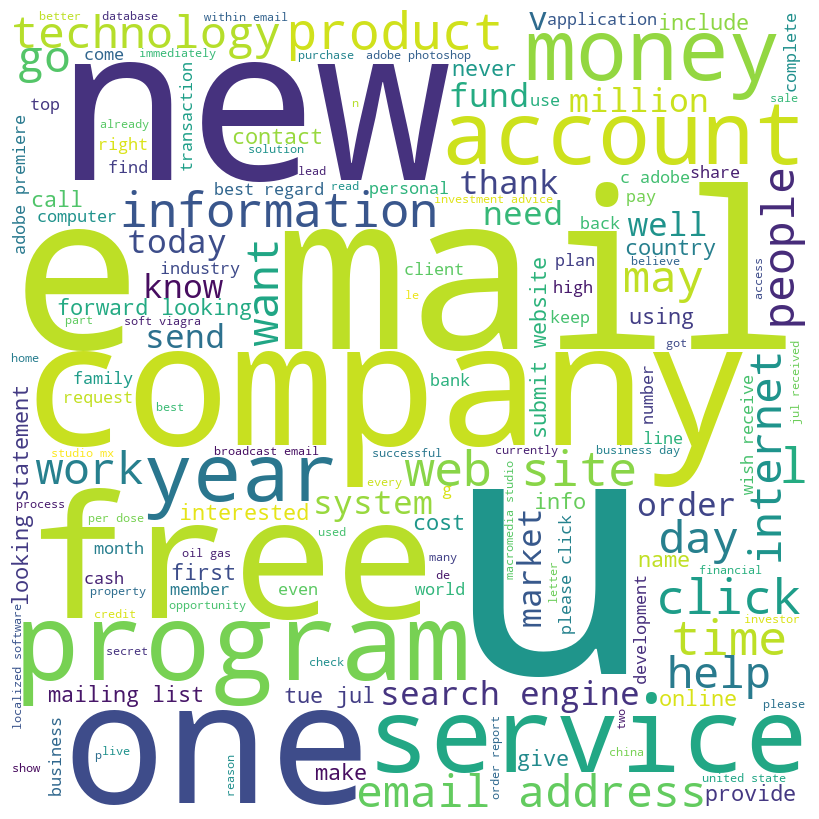

In [222]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [223]:
stopwords = set(STOPWORDS)

for val in dataset.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(non_spam)

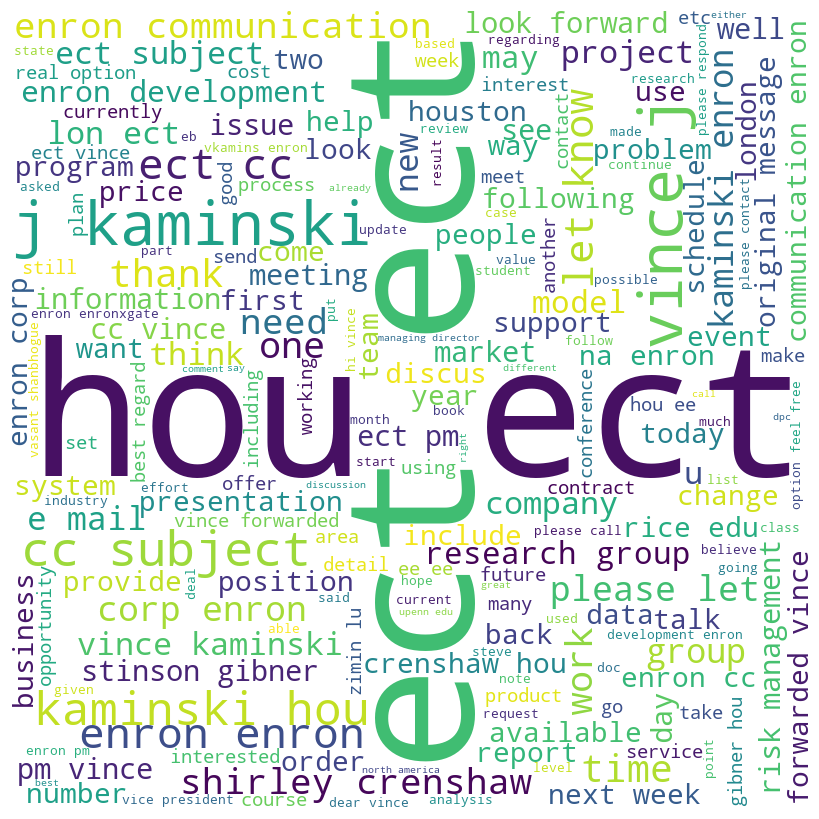

In [224]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## TF-IDF 

In [225]:
X = dataset['text']
y = dataset['spam']

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_ct  = vectorizer.transform(X)

In [226]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_ct,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(4582, 34579)
(4582,)


## Random forest

In [230]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

accuracy score is:  0.974694589877836
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       1.00      0.90      0.95       290

    accuracy                           0.97      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.97      0.97      1146

